# import auxiliar functions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install phonetics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for phonetics: filename=phonetics-1.0.5-py2.py3-none-any.whl size=8711 sha256=a3fff6bee66d9d1ed13e31571e2b10fbf02430b1ea2653ce82193334527f73e2
  Stored in directory: /root/.cache/pip/wheels/c2/c9/f4/5f43d3212d0aece0feced2484127ddb227ae43d57102aeb259
Successfully built phonetics


In [ ]:
import numpy as np
import pandas as pd
import phonetics as phn
import collections
import random
import matplotlib.pyplot as plt

# Load Data






In [ ]:
load_path = '/content/drive/MyDrive/DS4A/Proyecto_Final_project76/3. Development/Feature Engineering/data/'

df_ruv = pd.read_csv(load_path+"registros_ruv.csv", encoding="latin")
df_val = pd.read_csv(load_path+"registros_val.csv", encoding="latin")


# Functions for datacleaninig and calculate phonetic and lexicographic ids are defined.

In [ ]:
def remove_accents(df_clean):
    val_accents = {r'' : 'A',
                   r'' : 'E', 
                   r'' : 'I',
                   r'¡' : 'I', 
                   r'Ç': 'I', 
                   r'¢' : 'O', 
                   r'£' : 'U', 
                   r'¤' : 'N'}
    df_clean.replace(r"[\t\n\r]", '', regex=True, inplace=True)
    df_clean.replace(val_accents, regex=True, inplace=True)
    df_clean.replace(r'[^A-Z:]', '', regex=True, inplace=True)
    return df_clean

#TODO: VALIDATE IF IT REMOVES \n, \t, \r

In [ ]:
def dataset_clean(df_clean):
    df_clean.replace('Ç\?|\?|¥', 'N', regex=True, inplace=True)
    df_clean.replace(r"[ .·'-\(\)]|&amp;apos;|&apos;|ERR/QUERY", '', regex=True, inplace=True)
    df_clean.fillna(value='', inplace=True)
    df_clean[["NOM1","NOM2","APE1","APE2"]] = df_clean[["NOM1","NOM2","APE1","APE2"]].apply(lambda x :x.str.upper())
    return df_clean

In [ ]:
def concat_name(df:pd.DataFrame):
    df["FULLNAME"] = df["NOM1"]+df["NOM2"]+df["APE1"]+df["APE2"]
    return df

In [ ]:
def phonetic_ids(df:pd.DataFrame):
    df["NAMES_PHN"] = df["FULLNAME"].apply(lambda x : phn.metaphone(x))
    return df

In [ ]:
def lexicographic_ids(df:pd.DataFrame):
    letter_replacer= {r"V":"B", r"Y":"J", r"Z":"S", r"X":"S", r"LL":"J"}
    df["NAMES_LEX"] = df["FULLNAME"].replace(letter_replacer, regex=True)
    return df

trasnform word in to numbers 

  
*   [reference from cosine similarity](https://leonlok.co.uk/blog/finding-similar-names-using-cosine-similarity/)
*   refrence from ..


In [ ]:
def word2vec(word):
    prefix = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

    # Count the number of characters in each word.
    count_characters = collections.Counter(prefix+word)    
    count_characters.subtract(collections.Counter(prefix))
    
    # Gets the set of characters and calculates the "length" of the vector.
    set_characters = set(count_characters)

    # Frobenius vectorial norm using numpy library
    length = np.linalg.norm(tuple(count_characters.values()))  

    return np.array(list(count_characters.values()))#.reshape(1, -1) #, set_characters, length, word

In [ ]:
def vectorial_ids(df:pd.DataFrame):
    df["NAMES_VEC"] = df["FULLNAME"].apply(lambda x : word2vec(x))
    return df

# vectorial transformation 

In [ ]:
df_ruv = remove_accents(df_ruv)
df_ruv = dataset_clean(df_ruv)
df_ruv["FULLNAME"] = df_ruv["NOM1"]+' '+df_ruv["NOM2"]+' '+df_ruv["APE1"]+' '+df_ruv["APE2"]


df_ruv = phonetic_ids(df_ruv)
df_ruv = lexicographic_ids(df_ruv)
df_ruv = vectorial_ids(df_ruv)
df_ruv.head()

,DOC_RUV,NOM1,NOM2,APE1,APE2,FULLNAME,NAMES_PHN,NAMES_LEX,NAMES_VEC
0,,LUZ,STELLA,MARIMON,VALENCIA,LUZ STELLA MARIMON VALENCIA,LSSTLMRMNFLNS,LUS STEJA MARIMON BALENCIA,"[4, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 4, 2, 2, 1, ..."
1,,MARIA,TERESA,MARIN,NARVAEZ,MARIA TERESA MARIN NARVAEZ,MRTRSMRNNRFS,MARIA TERESA MARIN NARBAES,"[6, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, ..."
2,,ALBA,ROCIO,MARTINEZ,ZUBIETA,ALBA ROCIO MARTINEZ ZUBIETA,ALPRSMRTNSSPT,ALBA ROCIO MARTINES SUBIETA,"[4, 2, 1, 0, 2, 0, 0, 0, 3, 0, 0, 1, 1, 1, 2, ..."
3,,DIEGO,MAURICIO,VELASQUEZ,JARAMILLO,DIEGO MAURICIO VELASQUEZ JARAMILLO,TKMRSFLSKSJRML,DIEGO MAURICIO BELASQUES JARAMIJO,"[4, 0, 1, 1, 3, 0, 1, 0, 4, 1, 0, 3, 2, 0, 3, ..."
4,,ANYI,PAOLA,ROSO,PEALOZA,ANYI PAOLA ROSO PEALOZA,ANPLRSPLS,ANJI PAOLA ROSO PEALOSA,"[5, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 1, 4, ..."


In [ ]:
df_val = remove_accents(df_val)
df_val = dataset_clean(df_val)
df_val["FULLNAME"] = df_val["NOM1"]+' '+df_val["NOM2"]+' '+df_val["APE1"]+' '+df_val["APE2"]


df_val = phonetic_ids(df_val)
df_val = lexicographic_ids(df_val)
df_val = vectorial_ids(df_val)
df_val.head()

,DOC_VAL,NOM1,NOM2,APE1,APE2,FULLNAME,NAMES_PHN,NAMES_LEX,NAMES_VEC
0,,LUZ,STELLA,MARIMON,VALENCIA,LUZ STELLA MARIMON VALENCIA,LSSTLMRMNFLNS,LUS STEJA MARIMON BALENCIA,"[4, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 4, 2, 2, 1, ..."
1,,MARIA,TERESA,MARIN,NARVAEZ,MARIA TERESA MARIN NARVAEZ,MRTRSMRNNRFS,MARIA TERESA MARIN NARBAES,"[6, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, ..."
2,,ALBA,ROCIO,MARTINEZ,ZUBIETA,ALBA ROCIO MARTINEZ ZUBIETA,ALPRSMRTNSSPT,ALBA ROCIO MARTINES SUBIETA,"[4, 2, 1, 0, 2, 0, 0, 0, 3, 0, 0, 1, 1, 1, 2, ..."
3,,LEIDIS,JOHANA,MEJIA,QUINTERO,LEIDIS JOHANA MEJIA QUINTERO,LTSJHNMJKNTR,LEIDIS JOHANA MEJIA QUINTERO,"[3, 0, 0, 1, 3, 0, 0, 1, 4, 2, 0, 1, 1, 2, 2, ..."
4,,DIEGO,MAURICIO,VELASQUEZ,JARAMILLO,DIEGO MAURICIO VELASQUEZ JARAMILLO,TKMRSFLSKSJRML,DIEGO MAURICIO BELASQUES JARAMIJO,"[4, 0, 1, 1, 3, 0, 1, 0, 4, 1, 0, 3, 2, 0, 3, ..."


## train, test vectors

In [ ]:
def tensr_function(df, len = 1000,  variableName = 'NAMES_VEC'):
  X = np.zeros((len, 27))
  for i in range(X.shape[0]):
    X[i,:] = df[variableName][i]
  return X

In [ ]:
X = tensr_function(df_val)
max = X.max()
X_scal= X/max

In [ ]:
X.mean()

0.8341481481481482

In [ ]:
print(len(df_ruv))
print(len(df_val))

6421
6542


In [ ]:
common_characters = vector1[1].intersection(vector2[1])
common_characters

NameError: ignored

In [ ]:
sum(vector1[0][character] * vector2[0][character] for character in common_characters)

In [ ]:
# example use of word2vec cosine_similarity

def cosine_similarity(vector1, vector2, ndigits):
    
    # Get the common characters between the two character sets
    common_characters = vector1[1].intersection(vector2[1])

    # Sum of the product of each intersection character.
    product_summation = sum(vector1[0][character] * vector2[0][character] for character in common_characters)

    # Gets the length of each vector from the word2vec output.
    length = vector1[2] * vector2[2]

    # Calculates cosine similarity and rounds the value to ndigits decimal places.
    if length == 0:
        # Set value to 0 if word is empty.
        similarity = 0
    else:
        similarity = round(product_summation/length, ndigits)

    return similarity

In [ ]:
cosine_similarity(vector1, vector2, ndigits = 3)

##  Autoecoder 

[Autoencoders](https://colab.research.google.com/github/ageron/handson-ml2/blob/master/17_autoencoders_and_gans.ipynb)

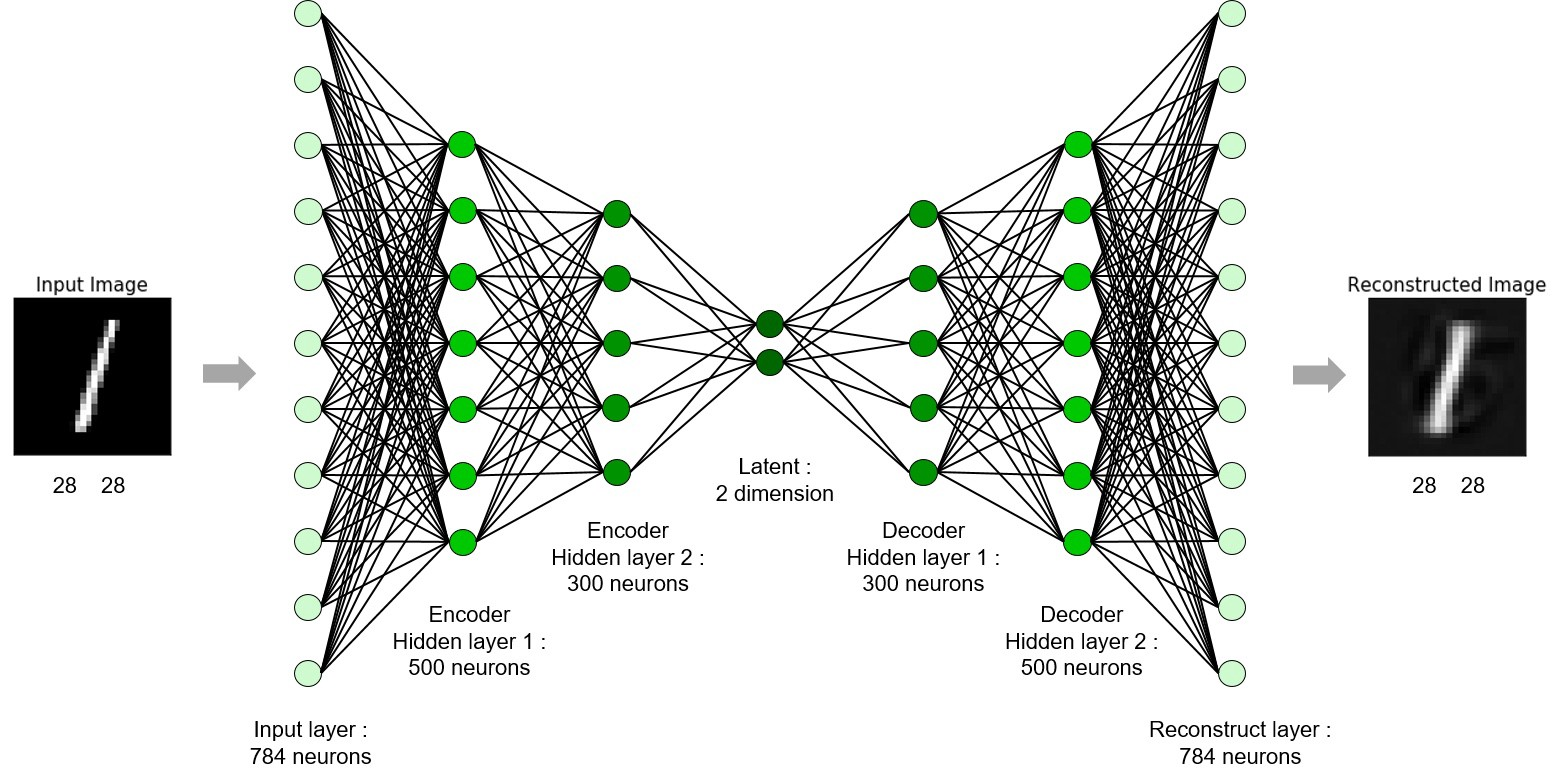

In [ ]:
#tensor Flow Moduls
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [ ]:
X_train, X_valid = X_scal[0:800], X_scal[800::]

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

denoising_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[X_scal.shape[1]]),
    keras.layers.GaussianNoise(0.2),
    keras.layers.Dense(100, activation="selu"),
    #keras.layers.Dropout(rate = 0.5),
    keras.layers.Dense(30, activation="selu")
])
denoising_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    #keras.layers.Dropout(rate = 0.5),
    keras.layers.Dense(X_scal.shape[1], activation="sigmoid"),
    keras.layers.Reshape([X_scal.shape[1]])
])

loss = tf.keras.losses.CosineSimilarity()
denoising_ae = keras.models.Sequential([denoising_encoder, denoising_decoder])
denoising_ae.compile(loss=loss, optimizer=keras.optimizers.SGD(learning_rate=1.0),
                     metrics=[rounded_accuracy]) #"binary_crossentropy"
history = denoising_ae.fit(X_train, X_train, epochs=100,
                           validation_data=(X_valid, X_valid))

Epoch 1/100
25/25 [==============================] - 4s 13ms/step - loss: -0.7860 - rounded_accuracy: 0.7327 - val_loss: -0.8354 - val_rounded_accuracy: 0.7820
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: -0.8357 - rounded_accuracy: 0.8154 - val_loss: -0.8492 - val_rounded_accuracy: 0.8526
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: -0.8407 - rounded_accuracy: 0.8280 - val_loss: -0.8560 - val_rounded_accuracy: 0.8491
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: -0.8459 - rounded_accuracy: 0.8339 - val_loss: -0.8589 - val_rounded_accuracy: 0.8650
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: -0.8497 - rounded_accuracy: 0.8450 - val_loss: -0.8680 - val_rounded_accuracy: 0.8300
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: -0.8524 - rounded_accuracy: 0.8428 - val_loss: -0.8751 - val_rounded_accuracy: 0.8687
Epoch 7/100
25/25 [==========================

dict_keys(['loss', 'rounded_accuracy', 'val_loss', 'val_rounded_accuracy'])


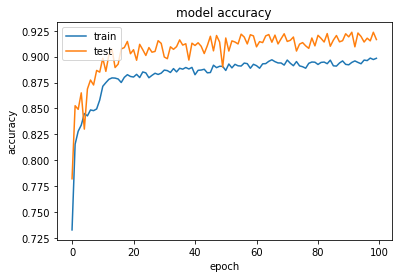

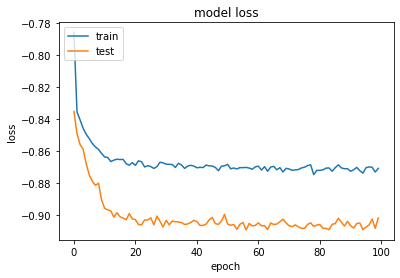

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['rounded_accuracy'])
plt.plot(history.history['val_rounded_accuracy'])  # RAISE ERROR
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) #RAISE ERROR
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Recurrent Neural Network

In [ ]:
from keras.layers import Input, Dense, SimpleRNN
from keras.models import Model
from keras import backend as K


In [ ]:
nombres = df_val['FULLNAME'].tolist()
nombres_val = ''
for i in range(len(nombres)): 
  name = nombres[i] + '\n'
  nombres_val = nombres_val + name 

In [ ]:
nombres_val

'LUZ STELLA MARIMON VALENCIA\nMARIA TERESA MARIN NARVAEZ\nALBA ROCIO MARTINEZ ZUBIETA\nLEIDIS JOHANA MEJIA QUINTERO\nDIEGO MAURICIO VELASQUEZ JARAMILLO\nANYI PAOLA ROSO PEALOZA\nKAREN VANESSA MASMUTA ORTIZ\nB A J C\nDIANA MARCELA LOAIZA BLANDON\nIRENES LEONOR TORO TRILLOS\nJAIDER ALFONSO QUINTERO DAZA\nESTELLA ESPERANZA BRAVO CRUZ\nCRHISTIAN ANDRES CARVAJAL JURADO\nJHON JAIRO BOHORQUEZ \nEDISON STIV BELTRAN \nBERTHA ROSA DEHOYOS \nPABLO EMILIO SANTANDER \nAMNA ELVIA MORA \nCAON ARMANDO CAON \nLIZ ELENA PULGARIN \nBETLIBEL MARIA ESTRADA \nCARMEN ESTHER VILLAREAL VELAZCO\nMARTHA DIONISIA WILCHES GUERRERO\nDORA ELENADELSOCORRO FLOREZ ARBOLEDA\nTHALIA MARGARITA PINILLA VILLAMIL\nLUZ ENITH RICARDO SANTA\nPEDRO ANTINIO PALTA MERA\nMARIA ANCELMA PALACIOS VALENCIA\nHELDER RAUL CAICEDO BUESAQUILLO\nJOSE ENRIQUE BARAHONA \nROSAS EDILMA GAVIRIA \nMARIA LUCIA MURILLO \nMARCO ABEL CHIPIAJE \nBERTHA GLORIA ASPRILLA \nCRISTIAN SMITH ILES \nURREGO BELTRANBLANCA LUZ MERY\nSOCARRAS ROSADOCIRO ALBERTO YU

In [ ]:
# Crear diccionario (listado de caracteres que no se repiten)
alfabeto = list(set(nombres_val))
tam_datos, tam_alfabeto = len(nombres_val), len(alfabeto)
print("En total hay %d caracteres, y el diccionario tiene un tamaño de %d caracteres." % (tam_datos, tam_alfabeto))

# Conversión de caracteres a índices y viceversa
car_a_ind = { car:ind for ind,car in enumerate(sorted(alfabeto))}
ind_a_car = { ind:car for ind,car in enumerate(sorted(alfabeto))}
print(car_a_ind)
print(ind_a_car)

En total hay 152976 caracteres, y el diccionario tiene un tamaño de 28 caracteres.
{'\n': 0, ' ': 1, 'A': 2, 'B': 3, 'C': 4, 'D': 5, 'E': 6, 'F': 7, 'G': 8, 'H': 9, 'I': 10, 'J': 11, 'K': 12, 'L': 13, 'M': 14, 'N': 15, 'O': 16, 'P': 17, 'Q': 18, 'R': 19, 'S': 20, 'T': 21, 'U': 22, 'V': 23, 'W': 24, 'X': 25, 'Y': 26, 'Z': 27}
{0: '\n', 1: ' ', 2: 'A', 3: 'B', 4: 'C', 5: 'D', 6: 'E', 7: 'F', 8: 'G', 9: 'H', 10: 'I', 11: 'J', 12: 'K', 13: 'L', 14: 'M', 15: 'N', 16: 'O', 17: 'P', 18: 'Q', 19: 'R', 20: 'S', 21: 'T', 22: 'U', 23: 'V', 24: 'W', 25: 'X', 26: 'Y', 27: 'Z'}


In [ ]:
# 2. MODELO
# ===========================================================
n_a = 25    # Número de unidades en la capa oculta
entrada  = Input(shape=(None,tam_alfabeto))
a0 = Input(shape=(n_a,))

celda_recurrente = SimpleRNN(n_a, activation='tanh', return_state = True)
capa_salida = Dense(tam_alfabeto, activation='softmax')

salida = []
hs, _ = celda_recurrente(entrada, initial_state=a0)
salida.append(capa_salida(hs))
modelo = Model([entrada,a0],salida)
#modelo.summary()

opt = tf.keras.optimizers.SGD(lr=0.0005)
modelo.compile(optimizer=opt, loss='categorical_crossentropy')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
# Crear lista con ejemplos de entrenamiento y mezclarla aleatoriamente

ejemplos = nombres
def train_generator():
  while True:
    # Tomar un ejemplo aleatorio
    ejemplo = ejemplos[np.random.randint(0,len(ejemplos))]

    # Convertir el ejemplo a representación numérica
    X = [None] + [car_a_ind[c] for c in ejemplo]

    # Crear "Y", resultado de desplazar "X" un caracter a la derecha
    Y = X[1:] + [car_a_ind['\n']]

    # Representar "X" y "Y" en formato one-hot
    x = np.zeros((len(X),1,tam_alfabeto))
    onehot = to_categorical(X[1:],tam_alfabeto).reshape(len(X)-1,1,tam_alfabeto)
    x[1:,:,:] = onehot
    y = to_categorical(Y,tam_alfabeto).reshape(len(X),tam_alfabeto)

    # Activación inicial (matriz de ceros)
    a = np.zeros((len(X), n_a))

    yield [x, a], y

In [ ]:
# 4. ENTRENAMIENTO
# ===========================================================
BATCH_SIZE = 32			# Número de ejemplos de entrenamiento a usar en cada iteración
NITS = 10000			# Número de iteraciones

for j in range(NITS):
    historia = modelo.fit_generator(train_generator(), steps_per_epoch=BATCH_SIZE, epochs=1, verbose=0)

    # Imprimir evolución del entrenamiento cada 1000 iteraciones
    if j%1000 == 0:
        print('\nIteración: %d, Error: %f' % (j, historia.history['loss'][0]) + '\n')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys



Iteración: 0, Error: 3.298042


Iteración: 1000, Error: 2.702846


Iteración: 2000, Error: 2.592122


Iteración: 3000, Error: 2.541555


Iteración: 4000, Error: 2.528930


Iteración: 5000, Error: 2.534091


Iteración: 6000, Error: 2.484778


Iteración: 7000, Error: 2.520045


Iteración: 8000, Error: 2.542444


Iteración: 9000, Error: 2.486695



In [ ]:
# 5. GENERACIÓN DE NOMBRES USANDO EL MODELO ENTRENADO
# ===========================================================
def generar_nombre(modelo,car_a_num,tam_alfabeto,n_a):
    # Inicializar x y a con ceros
    x = np.zeros((1,1,tam_alfabeto,))
    a = np.zeros((1, n_a))

    # Nombre generado y caracter de fin de linea
    nombre_generado = ''
    fin_linea = '\n'
    car = -1

    # Iterar sobre el modelo y generar predicción hasta tanto no se alcance
    # "fin_linea" o el nombre generado llegue a los 50 caracteres
    contador = 0
    while (car != fin_linea and contador != 50):
          # Generar predicción usando la celda RNN
          a, _ = celda_recurrente(K.constant(x), initial_state=K.constant(a))
          y = capa_salida(a)
          prediccion = K.eval(y)

          # Escoger aleatoriamente un elemento de la predicción (el elemento con
          # con probabilidad más alta tendrá más opciones de ser seleccionado)
          ix = np.random.choice(list(range(tam_alfabeto)),p=prediccion.ravel())

          # Convertir el elemento seleccionado a caracter y añadirlo al nombre generado
          car = ind_a_car[ix]
          nombre_generado += car

          # Crear x_(t+1) = y_t, y a_t = a_(t-1)
          x = to_categorical(ix,tam_alfabeto).reshape(1,1,tam_alfabeto)
          a = K.eval(a)

          # Actualizar contador y continuar
          contador += 1

          # Agregar fin de línea al nombre generado en caso de tener más de 50 caracteres
          if (contador == 50):
            nombre_generado += '\n'

    print(nombre_generado)

# Generar 100 ejemplos de nombres generados por el modelo ya entrenado
for i in range(100):
    generar_nombre(modelo,car_a_ind,tam_alfabeto,n_a)

O

Y RIA CUSINDRILORA NCEYEDMLIESDONEREZ SBEN MEDEREF

R

RY PORNRE CANUN SO Z 

 BERRYEGEDO  OHEZI JILELA

A BES ZWEIARELO   



ABESLTELAFERISES OU DGELE O

LGIAREREFERISSCELSORIZ VABES OREN JE    LUIRDES PE

AMILIONFAUFIRIMEO

A  HLEZUEELORCSDREZ CO

 

ACIIESCOROJA OKOZHNORA VORINOS GA  OJCERFA  GE

AGAFEL REOCSALRIE UIUARAS QUARILEDIRARIOEGELANIVAR

ODONARERECARIDIZDMETIQOLOBE

AMAZADERIERELIRIMOZARORIL

DEN

AN CO TO E A  BRIA ELENA GHOSOSES L REROSEGOJOSOJE

LMOONEV

INYIORRHALARORIOAY DEOA ISCURENANARIHARTORESEZ UHU

EVEIESANEZ O CUZ

OSERESAXAOSANOS TARURIBESACAJO IO EVEE  

 RUCEZIEIERIZ XAMO

AIOJIEPIZ

RIS

O 

SO  ON RIPA ANALAQILAO

OTEYOLANE

LELIUIORTO  E

TILRREREZASMOZOSESANAYZ BE

INRELJUNEDEUOZ MER 

O BEVANIREVEGULRCANTNMERTELOSEYAZES RO 

MAN  EKO GA 

NCIR

A A DERARHUIA ES TEZ RERATISEZ BCIATEZCZ

O  SAGELIHANAROLIXIN

 MALOLIGEZATEZ YESIGEZA PORERE  EV NTSACFZ

A PVAOSIZ S  CECAUETU ASEZ  OA 

O CEZ  UUDECIL CONENEVA GOROWOLEN XA

ERISOGEA GE

OYULA

A

VUSWRCP